### pip in Colab

In [ ]:
# For Google Colab use commands installing packages
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Install Pennylane and Pylatexenc in Google Colab
if IN_COLAB:
  !pip install pennylane pennylane-qiskit
  !pip install pylatexenc #for using MPL

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np
import random
import math

### Class

In [ ]:
class Q_Game:
  def __init__(self, start_box = 0, num_cases = 4, num_boxes = 16, ladder_pairs = [], check = False):
    '''
      ## Initialize for instances of this class ##
      num_cases(int) : power of 2, number of possible cases of Coins(Dice)
      num_boxes(int) : number of boxes in board, (n * n)
    '''
    self.num_boxes = math.ceil(np.log2(num_boxes)) # 16 -> 4, 32 -> 5
    self.wires_boxes = list(range(self.num_boxes))

    self.num_dice = math.ceil(np.log2(num_cases)) # 4 -> 2, 16 -> 4
    self.wires_dice = list(range(self.num_boxes, self.num_boxes + self.num_dice))

    self.ladder_pairs = ladder_pairs

    self.ladder_unitary = np.identity(2 ** (self.num_boxes))
    for a, b in ladder_pairs:
      self.ladder_unitary[a][a] = 0
      self.ladder_unitary[b][b] = 0
      self.ladder_unitary[a][b] = 1
      self.ladder_unitary[b][a] = 1

    if check:
      print('num_boxes : {}, wires_boxes : {}'.format(self.num_boxes, self.wires_boxes))
      print('num_dice : {}, wires_dice : {}'.format(self.num_dice, self.wires_dice))
      print('ladder_pairs = {}'.format(self.ladder_pairs))

    self.dev = qml.device("default.qubit", wires = self.num_boxes + self.num_dice)

  def roll_dice(self):
    for qubit in self.wires_dice:
      qml.Hadamard(qubit)

  def controlled_walk(self):
    for i in range(self.num_dice): # 0 ~ (num_dice - 1)
      for j in range(self.num_boxes - i): # 0 ~ (num_boxes - i - 1)
        con_bits = self.wires_boxes[j+1:self.num_boxes - i] + [self.wires_dice[i]]
        qml.MultiControlledX(con_bits, j)

  def print_bar(self, result):
    len_result = len(result)
    bits_num = int(np.log2(len_result))
    bits_list= [i for i in range(len_result)]
    x = np.arange(len_result)

    plt.figure(figsize=(10, 5))
    plt.bar(x, result,width=0.8)
    plt.xticks(x, bits_list)
    plt.xlabel('place', fontsize=10)
    plt.ylabel('Probability', fontsize=10)
    display(plt.show())

  def play2(self, count = 3, picture = True):
    @qml.qnode(self.dev)
    def play_rep(cnt = count):
      if cnt == 1:
        init_state = [1] + [0 for _ in range(2 ** (self.num_boxes + self.num_dice) - 1)]
      else:
        pre_result = play_rep(cnt - 1)
        #print('count : {}, pre_result : {}, len : {}'.format(cnt, pre_result, len(pre_result)))
        init_state = [0 for _ in range(2 ** (self.num_boxes + self.num_dice))]
        step = 2 ** self.num_dice
        for i, p in enumerate(pre_result):
          init_state[i * step] = p ** 0.5
      print('count : {}, init_state : {}'.format(cnt, init_state))
      qml.MottonenStatePreparation(state_vector = init_state, wires = range(self.num_boxes + self.num_dice))
      self.roll_dice()
      self.controlled_walk()
      qml.QubitUnitary(self.ladder_unitary, wires = self.wires_boxes)
      qml.Barrier()
      return qml.probs(self.wires_boxes)
    if picture:
      drawer = qml.draw_mpl(play_rep)
      print(drawer())
    result_probs = play_rep()
    self.print_bar(result_probs)
    return result_probs

  def play(self, count = 3, ladder_pairs = [], picture = True):
    @qml.qnode(self.dev)
    def inner_play(cnt = count):
      for _ in range(cnt):
        self.roll_dice()
        self.controlled_walk()
        qml.QubitUnitary(self.ladder_unitary, wires = self.wires_boxes)
        qml.Barrier()
      return qml.probs(self.wires_boxes)
    if picture:
      drawer = qml.draw_mpl(inner_play)
      print(drawer())
    result_probs = inner_play()
    self.print_bar(result_probs)
    return inner_play()



num_boxes : 4, wires_boxes : [0, 1, 2, 3]
num_dice : 2, wires_dice : [4, 5]
ladder_pairs = []
count : 1, init_state : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count : 2, init_state : [tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0]
coun

/usr/local/lib/python3.10/dist-packages/pennylane/ops/qubit/non_parametric_ops.py:2095: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


(<Figure size 8700x700 with 1 Axes>, <Axes: >)
count : 1, init_state : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
count : 2, init_state : [tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0.5, requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0, tensor(0., requires_grad=True), 0, 0, 0]
count : 3, init_state : [tensor(0.25, requires_grad

/usr/local/lib/python3.10/dist-packages/pennylane/ops/qubit/non_parametric_ops.py:2095: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


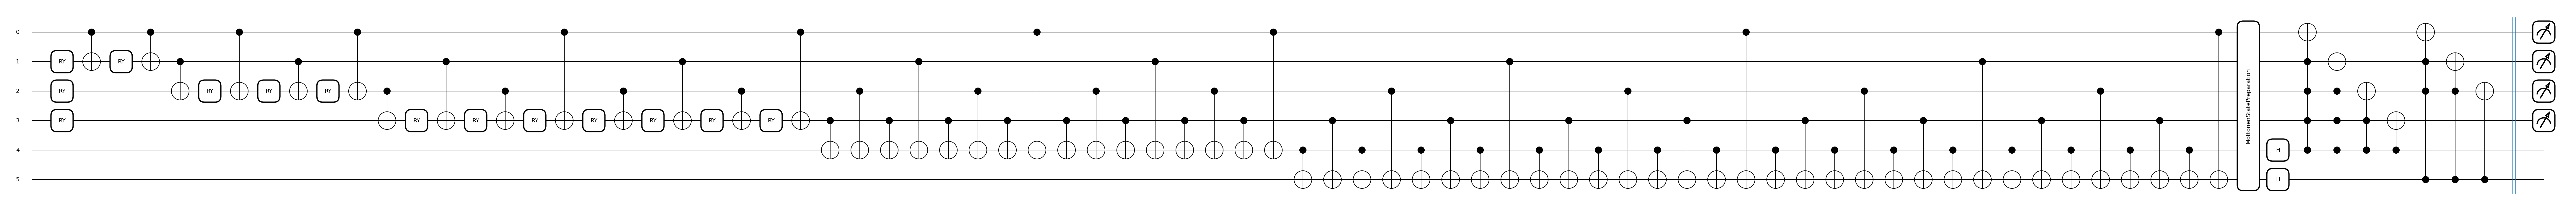

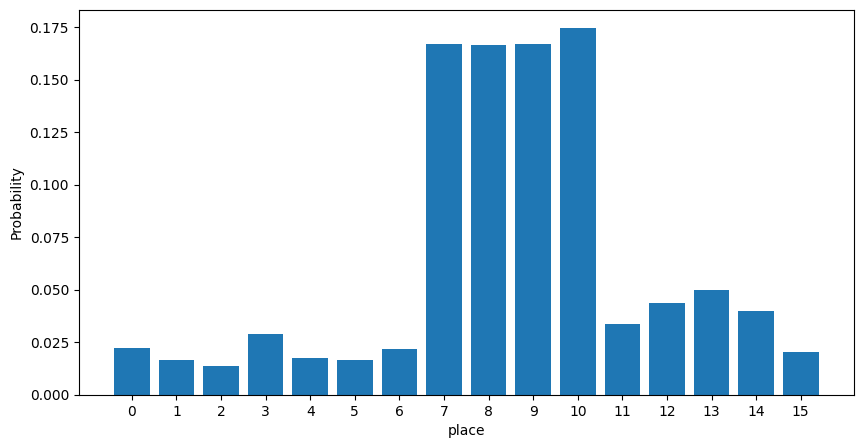

None

tensor([0.02224187, 0.01662614, 0.01356859, 0.02892756, 0.0174382 ,
        0.01629683, 0.02188902, 0.166985  , 0.16646945, 0.16699482,
        0.17452816, 0.03380465, 0.04385049, 0.05008221, 0.04001422,
        0.02028279], requires_grad=True)

In [ ]:
game = Q_Game(check = True)
game.play2(count = 4)
#drawer = game.print_Circuit()

num_boxes : 4, wires_boxes : [0, 1, 2, 3]
num_dice : 2, wires_dice : [4, 5]
ladder_pairs = [[3, 10]]
(<Figure size 2300x700 with 1 Axes>, <Axes: >)


/usr/local/lib/python3.10/dist-packages/pennylane/ops/qubit/non_parametric_ops.py:2095: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


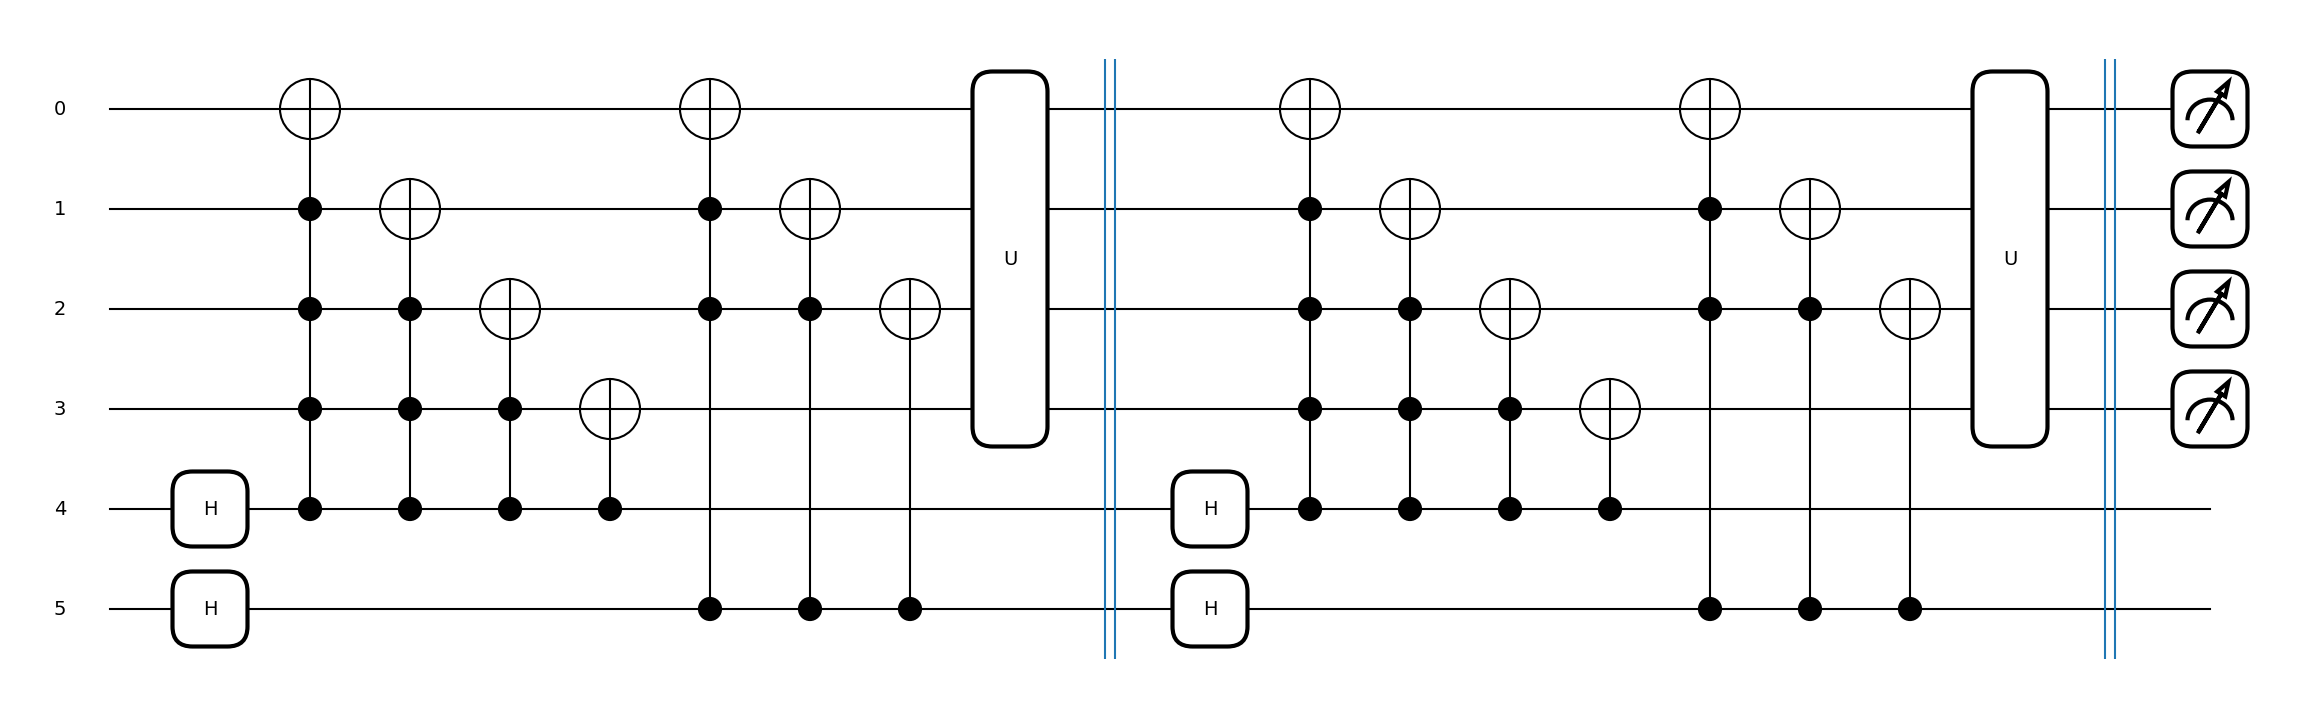

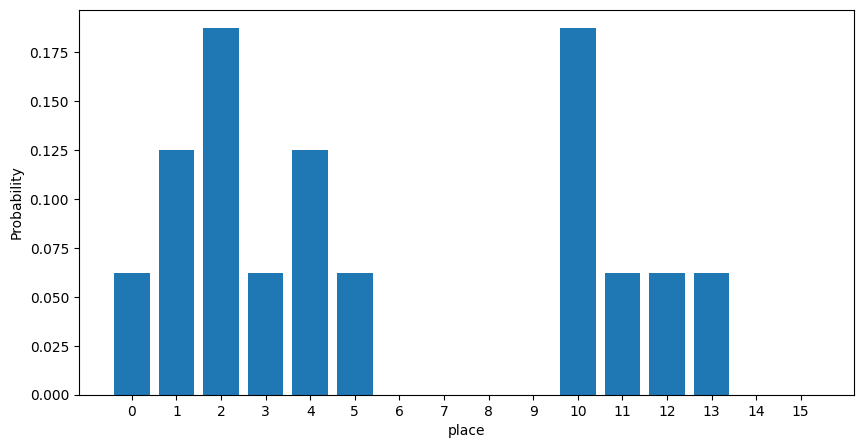

None

tensor([0.0625, 0.125 , 0.1875, 0.0625, 0.125 , 0.0625, 0.    , 0.    ,
        0.    , 0.    , 0.1875, 0.0625, 0.0625, 0.0625, 0.    , 0.    ], requires_grad=True)

In [ ]:
game2 = Q_Game(check = True, ladder_pairs = [[3, 10]])
game2.play(count = 2)
#drawer = game.print_Circuit()